<a href="https://colab.research.google.com/github/Nikitaion/mental_disorders/blob/main/mental_disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !wget https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/mental_disorders_with_manual_handling.csv -O ds.csv

!wget https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/190522_mental_disorders_data.csv -O ds.csv

--2022-05-19 18:29:52--  https://raw.githubusercontent.com/Nikitaion/mental_disorders/main/data/190522_mental_disorders_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65200 (64K) [text/plain]
Saving to: ‘ds.csv’

ds.csv              100%[===================>]  63.67K  --.-KB/s    in 0.007s  

2022-05-19 18:29:53 (9.39 MB/s) - ‘ds.csv’ saved [65200/65200]



In [2]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")

import pandas as pd
import numpy as np

from sklearn.model_selection import  train_test_split

from sklearn.preprocessing import StandardScaler


Tensorflow version: 2.8.0


In [3]:
ds = pd.read_csv("/content/ds.csv")
ds.head()

,Нарушения сна больше 5,Тревога больше 7,Madrs больше 6,Калгари больше 5,Пол,Полных лет,Образование,Род занятий,Семейное положение,Здоровье от 1 до 10,...,Т. пупок,Т. грудь,Т. бицепс,Т. трицепс,Т.предпл,Т. бедро,Т. икра,ESS,шкала общего клин впечатления,шкала соц функционир
0,да,нет,нет,нет,М,32.0,высшее,не работает,Холост,7.0,...,20.0,10.0,10.0,24.0,6.0,22.0,24.0,3.0,3.0,70.0
1,да,нет,да,да,М,26.0,среднее,не работает,Холост,10.0,...,10.0,10.0,5.0,12.0,4.0,7.0,12.0,1.0,4.0,60.0
2,нет,нет,нет,нет,М,49.0,среднее,не работает,Разведен,10.0,...,20.0,20.0,32.0,34.0,6.0,50.0,28.0,1.0,3.0,60.0
3,да,нет,нет,нет,М,50.0,среднее,не работает,Холост,7.0,...,30.0,10.0,15.0,20.0,5.0,10.0,10.0,6.0,4.0,60.0
4,да,нет,нет,нет,М,27.0,среднее,Работает,Разведен,9.0,...,10.0,8.0,10.0,18.0,4.0,28.0,8.0,10.0,3.0,70.0


In [4]:
ds.tail()

,Нарушения сна больше 5,Тревога больше 7,Madrs больше 6,Калгари больше 5,Пол,Полных лет,Образование,Род занятий,Семейное положение,Здоровье от 1 до 10,...,Т. пупок,Т. грудь,Т. бицепс,Т. трицепс,Т.предпл,Т. бедро,Т. икра,ESS,шкала общего клин впечатления,шкала соц функционир
188,нет,да,да,да,М,36.0,среднее,не работает,Холост,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,60.0
189,да,нет,нет,нет,М,29.0,незаконченное высшее,не работает,Холост,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4.0,70.0
190,да,да,да,да,Ж,52.0,среднее,Работает,Разведен,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,40.0
191,да,нет,да,нет,М,27.0,незаконченное высшее,не работает,Холост,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,40.0
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Нарушения сна больше 5                     192 non-null    object 
 1   Тревога больше 7                           192 non-null    object 
 2   Madrs больше 6                             192 non-null    object 
 3   Калгари больше 5                           192 non-null    object 
 4   Пол                                        192 non-null    object 
 5   Полных лет                                 192 non-null    float64
 6   Образование                                192 non-null    object 
 7   Род занятий                                192 non-null    object 
 8   Семейное положение                         192 non-null    object 
 9   Здоровье от 1 до 10                        189 non-null    float64
 10  Удовлетворенность семейным

In [6]:
ds.isna().sum()

Нарушения сна больше 5                        1
Тревога больше 7                              1
Madrs больше 6                                1
Калгари больше 5                              1
Пол                                           1
Полных лет                                    1
Образование                                   1
Род занятий                                   1
Семейное положение                            1
Здоровье от 1 до 10                           4
Удовлетворенность семейными отношениями       1
Удовлетворенность материальным положением     2
Были ли нарушения сна                         1
Рост                                          7
Вес                                           8
ИМТ                                          10
Динамека веса за год                          1
Операции                                      1
Аллергии                                      2
СД                                            2
Забол кожи                              

In [7]:
# drop unnecessary columns
ds = ds.drop(columns=['О. талии', 'О. бедра', 'О. запястья', 'О. Бедер', 'О. плеча', 'Т. спина', 'Т. пупок', 'Т. грудь', 'Т. бицепс', 'Т. трицепс', 'Т.предпл', 'Т. бедро', 'Т. икра'])
ds = ds.drop(columns=['Здоровье от 1 до 10', 'Удовлетворенность материальным положением', 'Рост', 'Вес', 'BARS (акатизия)', 'SAS (Экстрапир)', 'AIMS (непр дв)', 'ESS', 'шкала общего клин впечатления', 'шкала соц функционир'])

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Нарушения сна больше 5                   192 non-null    object 
 1   Тревога больше 7                         192 non-null    object 
 2   Madrs больше 6                           192 non-null    object 
 3   Калгари больше 5                         192 non-null    object 
 4   Пол                                      192 non-null    object 
 5   Полных лет                               192 non-null    float64
 6   Образование                              192 non-null    object 
 7   Род занятий                              192 non-null    object 
 8   Семейное положение                       192 non-null    object 
 9   Удовлетворенность семейными отношениями  192 non-null    float64
 10  Были ли нарушения сна                    192 non-n

In [9]:
ds.isna().sum()

Нарушения сна больше 5                      1
Тревога больше 7                            1
Madrs больше 6                              1
Калгари больше 5                            1
Пол                                         1
Полных лет                                  1
Образование                                 1
Род занятий                                 1
Семейное положение                          1
Удовлетворенность семейными отношениями     1
Были ли нарушения сна                       1
ИМТ                                        10
Динамека веса за год                        1
Операции                                    1
Аллергии                                    2
СД                                          2
Забол кожи                                  2
ГБ                                          2
Панкреатит                                  2
Дисфункция ЖКТ                              2
ЧМТ                                         3
Насл отягощенность                

In [10]:
# ИМТ to float32 (need to replace comma with dots before)
ds['ИМТ'] = ds['ИМТ'].str.replace(',','.').astype('float32')

In [11]:
ds['ИМТ'].mean()

25.05169105529785

In [12]:
# Fill ИМТ NaN with mean value
ds['ИМТ'] = ds['ИМТ'].fillna(ds['ИМТ'].mean())

In [13]:
ds.isna().sum()
# Much less NaN values

Нарушения сна больше 5                     1
Тревога больше 7                           1
Madrs больше 6                             1
Калгари больше 5                           1
Пол                                        1
Полных лет                                 1
Образование                                1
Род занятий                                1
Семейное положение                         1
Удовлетворенность семейными отношениями    1
Были ли нарушения сна                      1
ИМТ                                        0
Динамека веса за год                       1
Операции                                   1
Аллергии                                   2
СД                                         2
Забол кожи                                 2
ГБ                                         2
Панкреатит                                 2
Дисфункция ЖКТ                             2
ЧМТ                                        3
Насл отягощенность                         1
Дебют     

In [14]:
# Let's drop NaN
ds = ds.dropna(axis=0)
ds.isna().sum()

Нарушения сна больше 5                     0
Тревога больше 7                           0
Madrs больше 6                             0
Калгари больше 5                           0
Пол                                        0
Полных лет                                 0
Образование                                0
Род занятий                                0
Семейное положение                         0
Удовлетворенность семейными отношениями    0
Были ли нарушения сна                      0
ИМТ                                        0
Динамека веса за год                       0
Операции                                   0
Аллергии                                   0
СД                                         0
Забол кожи                                 0
ГБ                                         0
Панкреатит                                 0
Дисфункция ЖКТ                             0
ЧМТ                                        0
Насл отягощенность                         0
Дебют     

In [15]:
# ds[["Вес", "ИМТ", "Дебют", "Стаж шизофр"]].astype(np.float64)

In [16]:
# "Вес" to float
# ds["Вес"] = ds["Вес"].str.split().apply(lambda x: float(x[0].replace(',', '.')))

In [17]:
# "ИМТ" to float
# ds["ИМТ"] = ds["ИМТ"].str.split().apply(lambda x: float(x[0].replace(',', '.')))

In [20]:
# "Дебют" to float
ds['Дебют'] = ds['Дебют'].astype(str).str.replace(',','.').astype('float32')
# ds["Дебют"] = ds["Дебют"].str.split().apply(lambda x: float(x[0].replace(',', '.')))

In [21]:
# "Стаж шизофр" to float
ds["Стаж шизофр"] = ds["Стаж шизофр"].astype('str').str.split().apply(lambda x: float(x[0].replace(',', '.')))

In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 190
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Нарушения сна больше 5                   185 non-null    object 
 1   Тревога больше 7                         185 non-null    object 
 2   Madrs больше 6                           185 non-null    object 
 3   Калгари больше 5                         185 non-null    object 
 4   Пол                                      185 non-null    object 
 5   Полных лет                               185 non-null    float64
 6   Образование                              185 non-null    object 
 7   Род занятий                              185 non-null    object 
 8   Семейное положение                       185 non-null    object 
 9   Удовлетворенность семейными отношениями  185 non-null    float64
 10  Были ли нарушения сна                    185 non-n

In [23]:
ds["Нарушения сна больше 5"].value_counts()

да     116
нет     69
Name: Нарушения сна больше 5, dtype: int64

In [24]:
# Why i did this?
# We have one-hot encoding lol -_-

def change_value_to_numeric(x):
  if type(x) == int or type(x) == float:
    return x

  x = x.strip().lower() # remove spaces and make lower

  if x == "да":
    return 1
  elif x == "нет":
    return 0
  elif x == "м":
    return 1
  elif x == "ж":
    return 0
  
  # Род занятий
  elif x== "не работает":
    return 0
  elif x == "работает":
    return 1
  elif x == "учится":
    return 2
  elif x == "пенсионер":
    return 3
  
  # Семейное положение:
  elif x == "холост":
    return 0 
  elif x == "женат":
    return 1
  elif x == "разведен":
    return 2
  elif x == "вдовец":
    return 3

  # Образование:
  elif x == "среднее":
    return 0 
  elif x == "незаконченное высшее":
    return 1
  elif x == "высшее":
    return 2
  elif x == "неполное среднее":
    return 3
  elif x == "начальное":
    return 4

  # Динамика веса за год:
  elif x == "стабильный вес":
    return 0 
  elif x == "снижение веса":
    return 1
  elif x == "увеличение веса":
    return 2

  # ЧМТ:
  elif x == "нет":
    return 0 
  elif x == "да (без потери сознания)":
    return 1
  elif x == "да (с потерей сознания)":
    return 2

  # Преобл синдром:
  elif x == "аффективно-параноидный":
    return 0 
  elif x == "параноидный":
    return 1
  elif x == "галлюцинаторно-параноидный":
    return 2
  elif x == "парафренный":
    return 3
  elif x == "кататонический":
    return 4

  return "NaN"

In [26]:
ds.applymap(lambda x: change_value_to_numeric(x))

,Нарушения сна больше 5,Тревога больше 7,Madrs больше 6,Калгари больше 5,Пол,Полных лет,Образование,Род занятий,Семейное положение,Удовлетворенность семейными отношениями,...,Панкреатит,Дисфункция ЖКТ,ЧМТ,Насл отягощенность,Дебют,Стаж шизофр,Преобл синдром,P,N,G
0,1,0,0,0,1,32.0,2,0,0,5.0,...,0,0,1,0,28.299999,3.7,2,11.0,11.0,18.0
1,1,0,1,1,1,26.0,0,0,0,5.0,...,0,0,0,0,26.000000,2.0,1,10.0,25.0,36.0
2,0,0,0,0,1,49.0,0,0,2,5.0,...,0,0,1,0,26.000000,23.0,0,9.0,16.0,23.0
3,1,0,0,0,1,50.0,0,0,0,5.0,...,0,0,2,0,16.000000,34.0,1,13.0,13.0,20.0
4,1,0,0,0,1,27.0,0,1,2,5.0,...,0,0,1,0,21.000000,6.0,1,7.0,9.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,0,1,0,1,34.0,0,0,0,5.0,...,0,0,0,0,25.000000,9.0,0,14.0,36.0,38.0
187,1,1,0,0,1,32.0,2,0,1,4.0,...,0,0,1,1,20.000000,12.0,2,15.0,21.0,41.0
188,0,1,1,1,1,36.0,0,0,0,4.0,...,0,1,1,1,21.000000,15.0,1,10.0,22.0,40.0
189,1,0,0,0,1,29.0,1,0,0,4.0,...,0,0,2,1,22.000000,7.0,1,10.0,15.0,29.0


In [27]:
ds = ds.applymap(lambda x: change_value_to_numeric(x))

In [28]:
ds.head()

,Нарушения сна больше 5,Тревога больше 7,Madrs больше 6,Калгари больше 5,Пол,Полных лет,Образование,Род занятий,Семейное положение,Удовлетворенность семейными отношениями,...,Панкреатит,Дисфункция ЖКТ,ЧМТ,Насл отягощенность,Дебют,Стаж шизофр,Преобл синдром,P,N,G
0,1,0,0,0,1,32.0,2,0,0,5.0,...,0,0,1,0,28.299999,3.7,2,11.0,11.0,18.0
1,1,0,1,1,1,26.0,0,0,0,5.0,...,0,0,0,0,26.000000,2.0,1,10.0,25.0,36.0
2,0,0,0,0,1,49.0,0,0,2,5.0,...,0,0,1,0,26.000000,23.0,0,9.0,16.0,23.0
3,1,0,0,0,1,50.0,0,0,0,5.0,...,0,0,2,0,16.000000,34.0,1,13.0,13.0,20.0
4,1,0,0,0,1,27.0,0,1,2,5.0,...,0,0,1,0,21.000000,6.0,1,7.0,9.0,22.0


In [29]:
# Check for na values
ds.isna().sum()

Нарушения сна больше 5                     0
Тревога больше 7                           0
Madrs больше 6                             0
Калгари больше 5                           0
Пол                                        0
Полных лет                                 0
Образование                                0
Род занятий                                0
Семейное положение                         0
Удовлетворенность семейными отношениями    0
Были ли нарушения сна                      0
ИМТ                                        0
Динамека веса за год                       0
Операции                                   0
Аллергии                                   0
СД                                         0
Забол кожи                                 0
ГБ                                         0
Панкреатит                                 0
Дисфункция ЖКТ                             0
ЧМТ                                        0
Насл отягощенность                         0
Дебют     

In [30]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 190
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Нарушения сна больше 5                   185 non-null    int64  
 1   Тревога больше 7                         185 non-null    int64  
 2   Madrs больше 6                           185 non-null    int64  
 3   Калгари больше 5                         185 non-null    int64  
 4   Пол                                      185 non-null    int64  
 5   Полных лет                               185 non-null    float64
 6   Образование                              185 non-null    int64  
 7   Род занятий                              185 non-null    int64  
 8   Семейное положение                       185 non-null    int64  
 9   Удовлетворенность семейными отношениями  185 non-null    float64
 10  Были ли нарушения сна                    185 non-n

In [31]:
# turn dataset to float32
ds = ds.astype(np.float32)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 190
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Нарушения сна больше 5                   185 non-null    float32
 1   Тревога больше 7                         185 non-null    float32
 2   Madrs больше 6                           185 non-null    float32
 3   Калгари больше 5                         185 non-null    float32
 4   Пол                                      185 non-null    float32
 5   Полных лет                               185 non-null    float32
 6   Образование                              185 non-null    float32
 7   Род занятий                              185 non-null    float32
 8   Семейное положение                       185 non-null    float32
 9   Удовлетворенность семейными отношениями  185 non-null    float32
 10  Были ли нарушения сна                    185 non-n

In [ ]:
ds['Нарушения сна'].value_counts()

In [ ]:
ds['Тревога'].value_counts()


In [ ]:
ds['Депрессия'].value_counts()

###  Note to myrself. Стаж шизофр variable greatly reduced prediction accuracy after it was removed

In [ ]:
# Let's try to use 'Нарушения сна' as y value
data = ds.drop(columns=['Тревога', 'Депрессия'])

In [ ]:
y = data['Нарушения сна']
# X = data.drop(columns=['Нарушения сна'])
# X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_valid_scaled = scaler.transform(X_valid)

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_valid_scaled = minmax_scaler.transform(X_valid)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.003), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history0 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


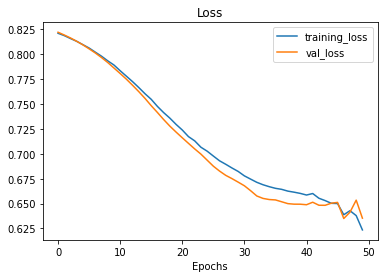

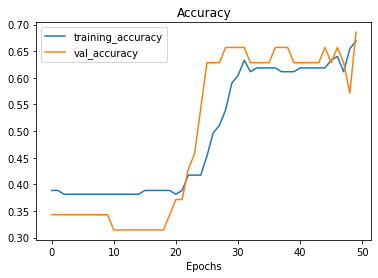

In [ ]:
plot_loss_curves(history0)

### Find bels LR

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.003
    metrics=["accuracy"]
)

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # Learning rate will increase at each epoch

history_lr = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=100,
                    validation_data = (X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/100
5/5 [==============================] - 1s 51ms/step - loss: 0.8212 - accuracy: 0.3885 - val_loss: 0.8222 - val_accuracy: 0.3429 - lr: 1.0000e-04
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.8188 - accuracy: 0.3885 - val_loss: 0.8195 - val_accuracy: 0.3429 - lr: 1.1220e-04
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.8159 - accuracy: 0.3813 - val_loss: 0.8165 - val_accuracy: 0.3429 - lr: 1.2589e-04
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.8131 - accuracy: 0.3813 - val_loss: 0.8131 - val_accuracy: 0.3429 - lr: 1.4125e-04
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.8097 - accuracy: 0.3813 - val_loss: 0.8096 - val_accuracy: 0.3429 - lr: 1.5849e-04
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.8064 - accuracy: 0.3813 - val_loss: 0.8055 - val_accuracy: 0.3429 - lr: 1.7783e-04
Epoch 7/100
5/5 [==============================] - 0s 11ms

Text(0.5, 1.0, 'Learning rate vs. loss')

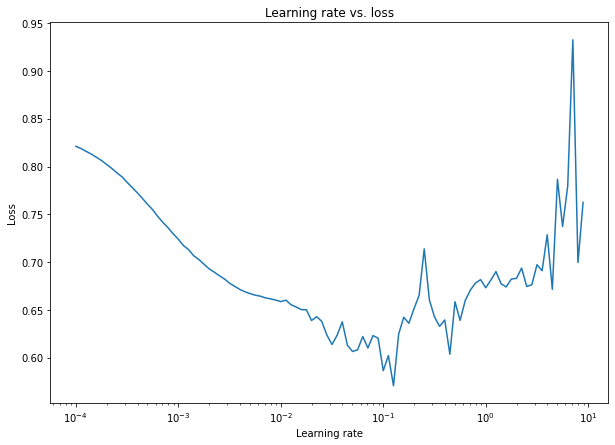

In [ ]:
import matplotlib.pyplot as plt

# Plot the learning rate vs loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_lr.history["loss"]) # lrs - x-axis, history - y-axis
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    # tf.keras.layers.Dense(10, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.03),
    metrics=["accuracy"]
)


history1 = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_valid_scaled, y_valid))

Epoch 1/50
5/5 [==============================] - 1s 71ms/step - loss: 0.6806 - accuracy: 0.6115 - val_loss: 0.6523 - val_accuracy: 0.6571
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6687 - accuracy: 0.6115 - val_loss: 0.6672 - val_accuracy: 0.6571
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6731 - accuracy: 0.6115 - val_loss: 0.6608 - val_accuracy: 0.6571
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6654 - accuracy: 0.6115 - val_loss: 0.6467 - val_accuracy: 0.6571
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.6596 - accuracy: 0.6115 - val_loss: 0.6465 - val_accuracy: 0.6571
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 0.6575 - accuracy: 0.6115 - val_loss: 0.6464 - val_accuracy: 0.6571
Epoch 7/50
5/5 [==============================] - 0s 12ms/step - loss: 0.6559 - accuracy: 0.6115 - val_loss: 0.6550 - val_accuracy: 0.6571
Epoch 8/50
5/5 [===========

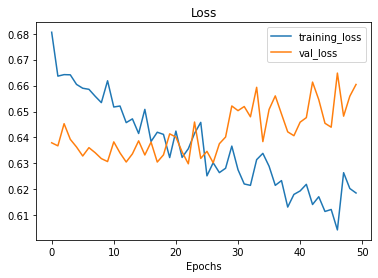

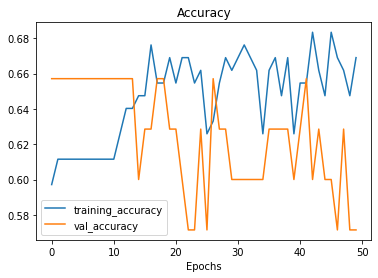

In [ ]:
plot_loss_curves(history1)

In [ ]:
train_data = data[:121] # 70%
validation_data = data[121:155] # 20%
test_data = data[155:174] # 10%

In [ ]:
y_train = train_data['Нарушения сна']
y_validation = validation_data['Нарушения сна']
y_test = test_data['Нарушения сна']

X_train = train_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_validation = validation_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
X_test = test_data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]

In [ ]:
len(y_train), len(y_validation), len(y_test)

(121, 34, 19)

In [ ]:
# y = data['Нарушения сна']
# # X = data.drop(columns=['Нарушения сна'])
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование']]
# # X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']]
# X = data[[ 'P', 'N', 'G']] # Only with these 3 values we can get very good result

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [ ]:
# Scale X from 0 to 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.fit_transform(X_validation)
X_test_scaled = scaler.transform(X_test)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_validation_scaled, y_validation))

Epoch 1/50
4/4 [==============================] - 1s 43ms/step - loss: 0.6809 - accuracy: 0.6033 - val_loss: 0.6716 - val_accuracy: 0.6765
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 0.6521 - accuracy: 0.6116 - val_loss: 0.6652 - val_accuracy: 0.6471
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.6316 - accuracy: 0.6612 - val_loss: 0.6622 - val_accuracy: 0.6765
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.6147 - accuracy: 0.6860 - val_loss: 0.6633 - val_accuracy: 0.6765
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5985 - accuracy: 0.6942 - val_loss: 0.6685 - val_accuracy: 0.7353
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5809 - accuracy: 0.7107 - val_loss: 0.6745 - val_accuracy: 0.6765
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5638 - accuracy: 0.7273 - val_loss: 0.6753 - val_accuracy: 0.6765
Epoch 8/50
4/4 [================

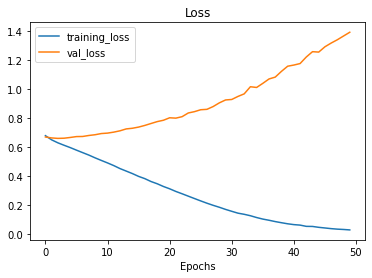

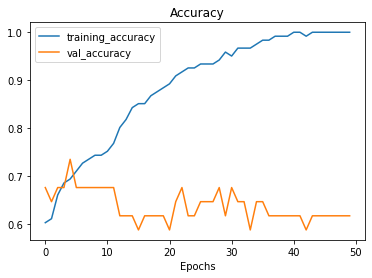

In [ ]:
plot_loss_curves(history)

### It is very likely that the model has overfitted. It is necessary to add data augmentation, validation data, visualization
Find best lr

Вывести наиболее значимые характеристики



Check result on different scalers. For example:

1) Min Max Scaler (try it)

2) Standard Scaler

3) Max Abs Scaler

4) Robust Scaler

5) Quantile Transformer Scaler

6) Power Transformer Scaler

7) Unit Vector Scaler



In [ ]:
# Let's try to use 'Нарушения сна' as y value
data = ds.drop(columns=['Тревога', 'Депрессия'])
y = data['Нарушения сна']
# X = data.drop(columns=['Нарушения сна'])
X = data[['Пол', 'Удовлетворенность семейными отношениями', 'ЧМТ','Стаж шизофр', 'Образование', 'Насл отягощенность', 'P', 'N', 'G']] # 'Были ли нарушения сна', 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

# Scale X from 0 to 1
scaler2 = StandardScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.6918984 ,  0.8722883 ,  1.3401407 , ..., -0.5061745 ,
        -0.38204715, -0.22233704],
       [ 0.6918984 ,  0.8722883 , -1.1435868 , ..., -0.35486642,
         2.2368073 ,  0.5268714 ],
       [-1.4452989 , -1.0833257 , -1.1435868 , ...,  0.25036588,
         0.4909044 , -0.03503493],
       ...,
       [ 0.6918984 ,  0.22041692,  1.3401407 , ...,  0.8555982 ,
        -0.5275391 , -0.12868598],
       [ 0.6918984 ,  0.22041692,  0.09827699, ...,  0.0990578 ,
         0.05442863, -0.22233704],
       [ 0.6918984 ,  0.8722883 , -1.1435868 , ..., -0.20355834,
        -0.09106328, -0.3159881 ]], dtype=float32)

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(), # lr=0.03
    metrics=["accuracy"]
)

history2 = model2.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6331
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6403
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6255 - accuracy: 0.6403
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.6403
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5987 - accuracy: 0.6763
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.6906
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.6978
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5593 - accuracy: 0.6978
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7194
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.7338
Epoch 11/50
5/5 [======================